# Supervisely Tutorial #3

# Augmentations with Supervisely Python SDK


description

description

description

# Imports

In [1]:
%matplotlib inline
import supervisely_lib as sly
import json
import matplotlib.pyplot as plt
import numpy as np

# Read image and its annotation

In [2]:
project = sly.Project('./tutorial_project', sly.OpenMode.READ)
dataset = project.datasets.get("dataset_01")
img_path, ann_path = dataset.get_item_paths("image_01")

In [3]:
img = sly.image.read(img_path)

with open(ann_path) as file:
    ann_json = json.load(file)
ann = sly.Annotation.from_json(ann_json, project.meta)

In [4]:
#helper function to draw image and annotation

def draw(img, ann):
    canvas_draw = np.copy(img)
    canvas_draw_contour = np.copy(img)
    ann.draw(canvas_draw)
    ann.draw_contour(canvas_draw_contour, thickness=4)
    
    fig = plt.figure(figsize=(20, 20))
    #plt.suptitle(title, fontsize=20)
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(img)
    
    fig.add_subplot(1, 3, 2)
    plt.imshow(canvas_draw)
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(canvas_draw_contour)
    
    plt.show()

# Original image and its annotation

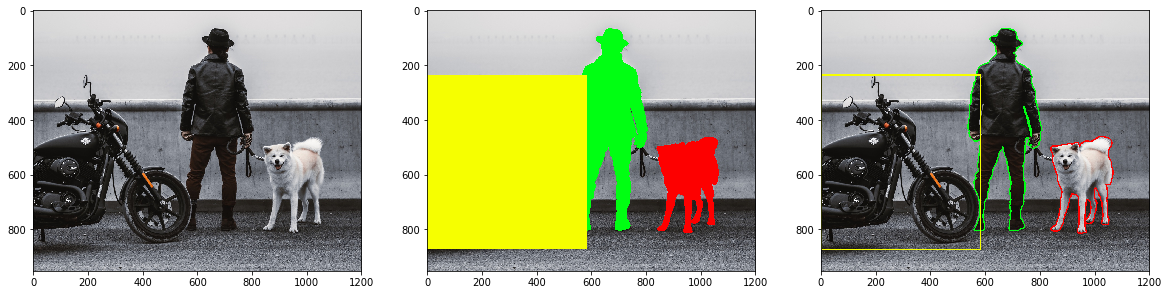

In [5]:
draw(img, ann)

# Flip from left to right

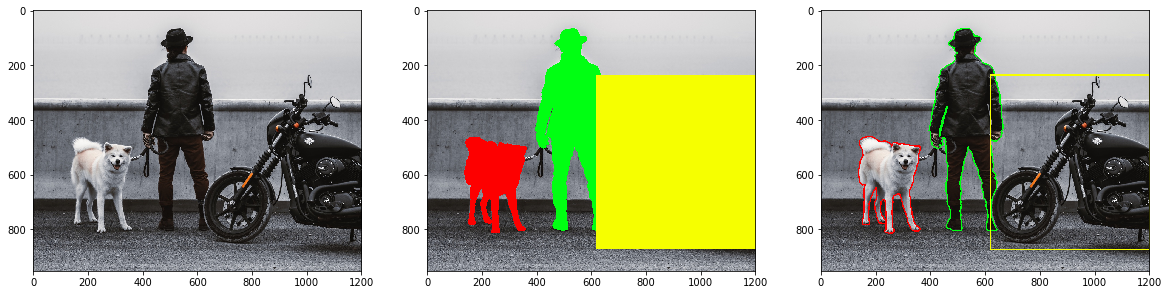

In [6]:
flipped_img, flipped_ann = sly.aug.fliplr(img, ann)
draw(flipped_img, flipped_ann)

# Flip from up to down

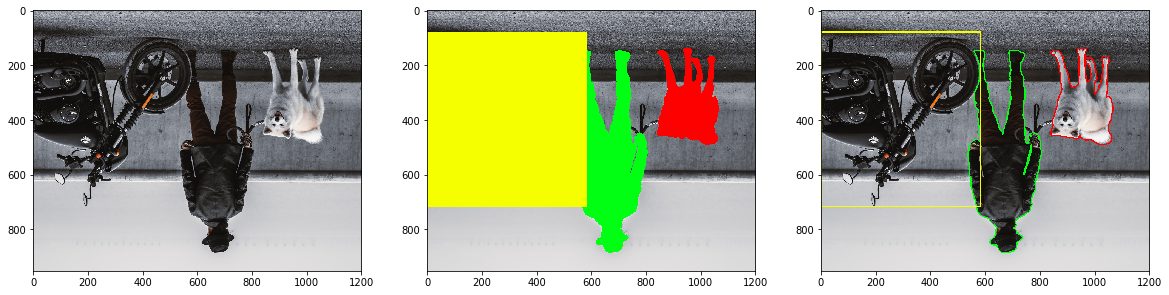

In [7]:
flipped_img, flipped_ann = sly.aug.flipud(img, ann)
draw(flipped_img, flipped_ann)

# Random Crops - height and width from range

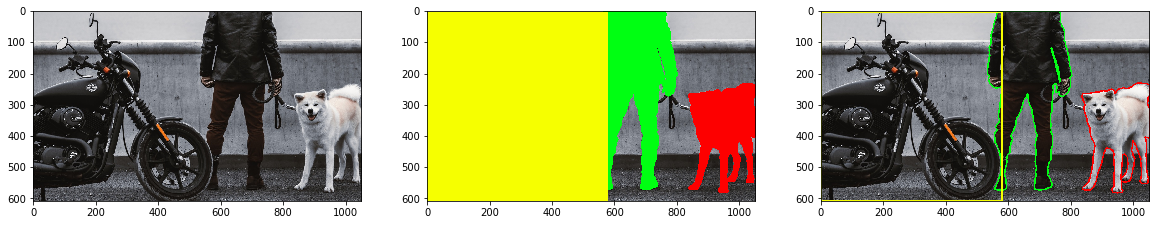

In [8]:
cropped_img, cropped_ann = sly.aug.random_crop_percent(img, ann, (0.5, 0.7), (0.5, 0.9))
draw(cropped_img, cropped_ann)

# Random crop - fixed height and width

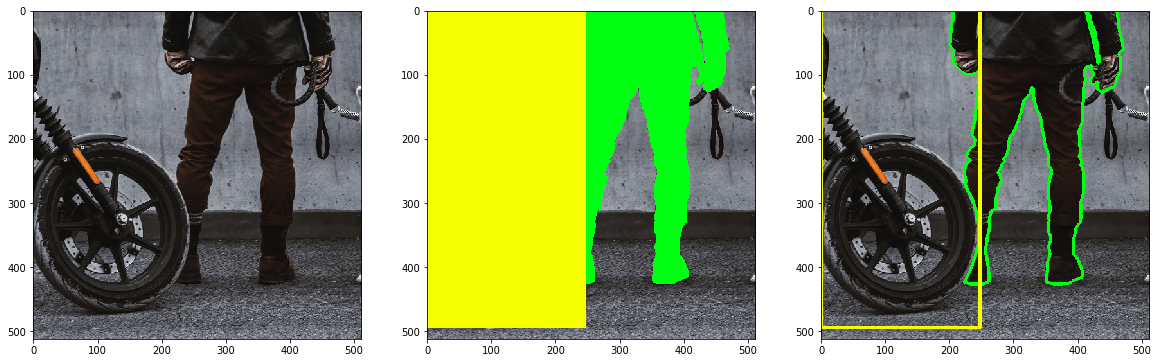

In [9]:
cropped_img, cropped_ann = sly.aug.random_crop(img, ann, height=512, width=512)
draw(cropped_img, cropped_ann)

# Crop ROI (relative)

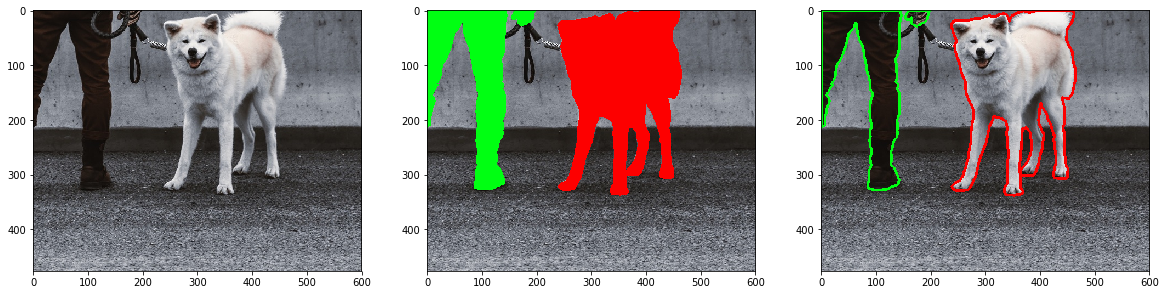

In [10]:
# crop right quarter of the image
cropped_img, cropped_ann = sly.aug.crop_percent(img, ann, top=0.5, left=0.5, bottom=0, right=0)
draw(cropped_img, cropped_ann)

# Crop ROI (absolute)

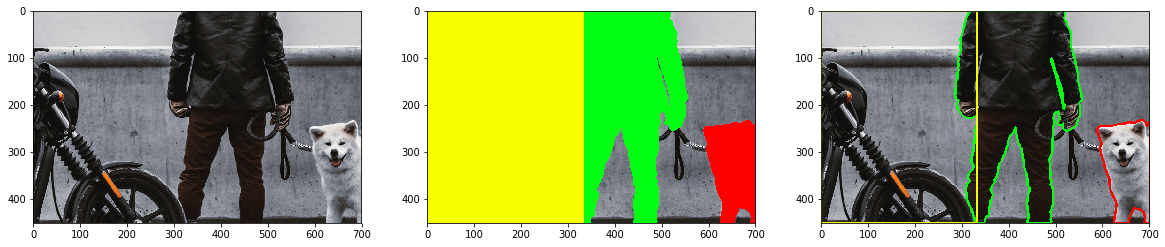

In [11]:
# crop right quarter of the image
cropped_img, cropped_ann = sly.aug.crop(img, ann, top_pad=250, left_pad=250, bottom_pad=250, right_pad=250)
draw(cropped_img, cropped_ann)

# Resize

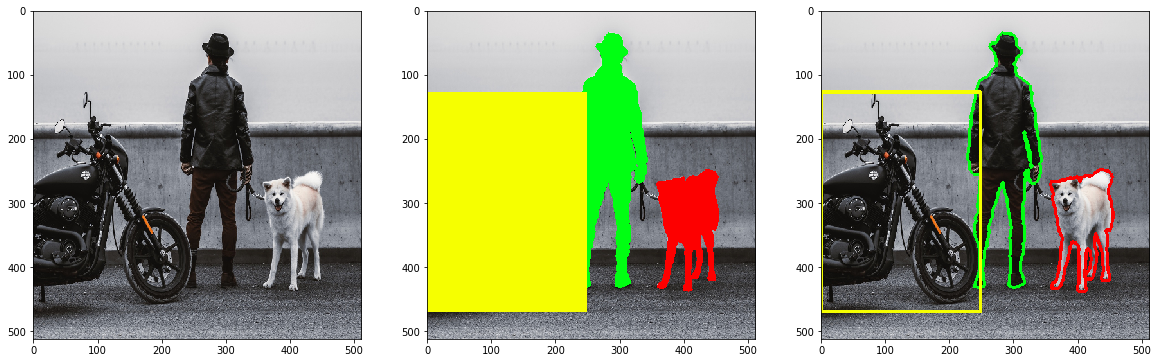

In [12]:
resized_img, resized_ann = sly.aug.resize(img, ann, size=(512, 512))
draw(resized_img, resized_ann)

# Scale proportionally

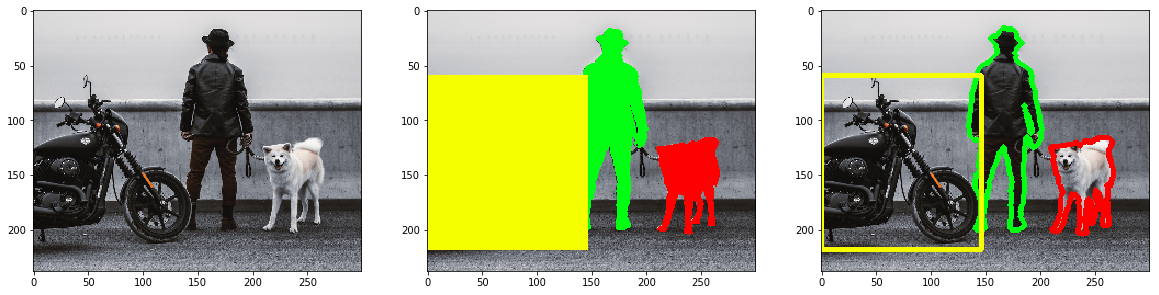

In [13]:
resized_img, resized_ann = sly.aug.scale(img, ann, f=0.25)
draw(resized_img, resized_ann)

# Rotate (with padding)

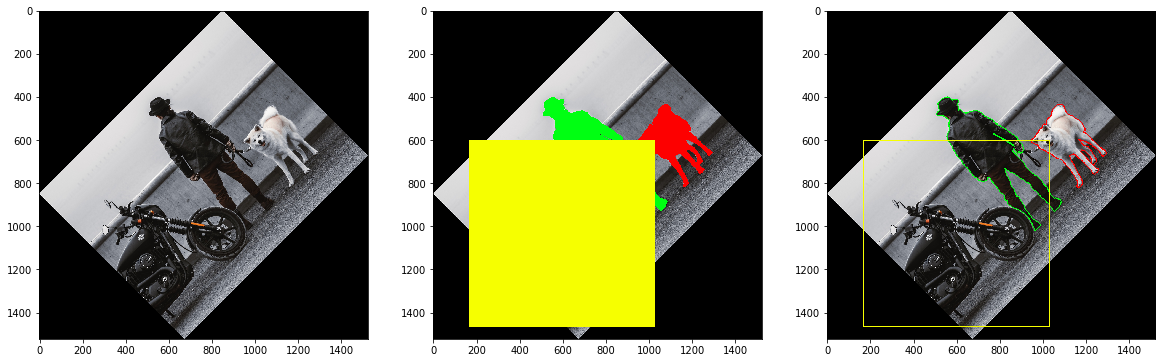

In [14]:
rotated_img, rotated_ann = sly.aug.rotate(img, ann, min_degrees=45, max_degrees=45, mode=sly.aug.RotationModes.KEEP)
draw(rotated_img, rotated_ann)

# Rotate (without padding)

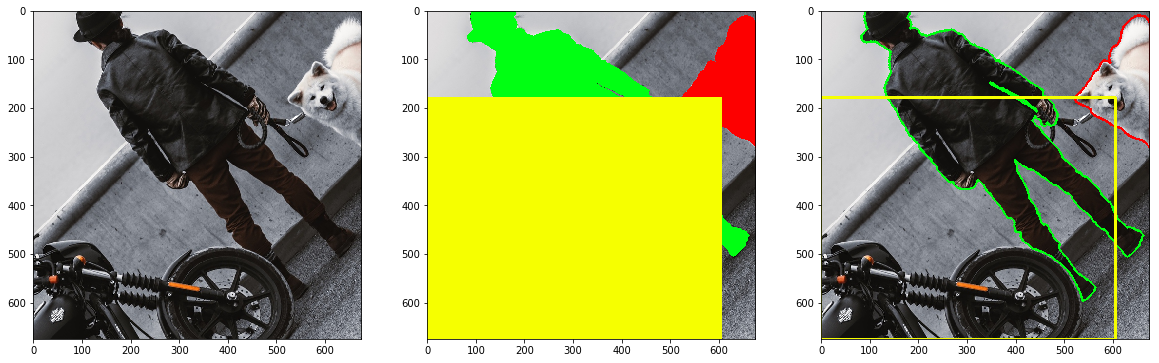

In [15]:
rotated_img, rotated_ann = sly.aug.rotate(img, ann, min_degrees=45, max_degrees=45, mode=sly.aug.RotationModes.CROP)
draw(rotated_img, rotated_ann)

# Instance crop 

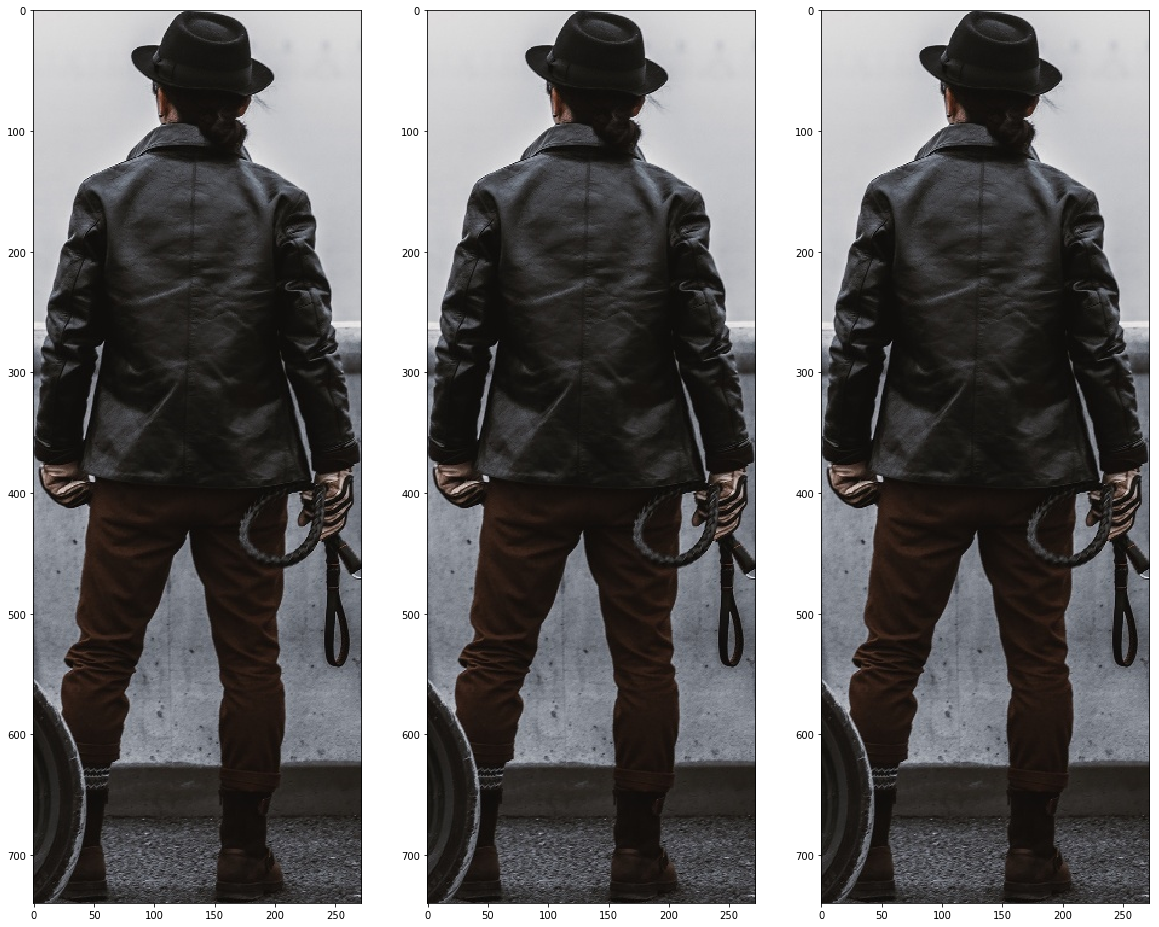

In [16]:
crops_list = sly.aug.instances_crop(img, ann, "person")
for ic_img, ic_ann in crops_list:
    draw(ic_img, ic_ann)

# Brightness

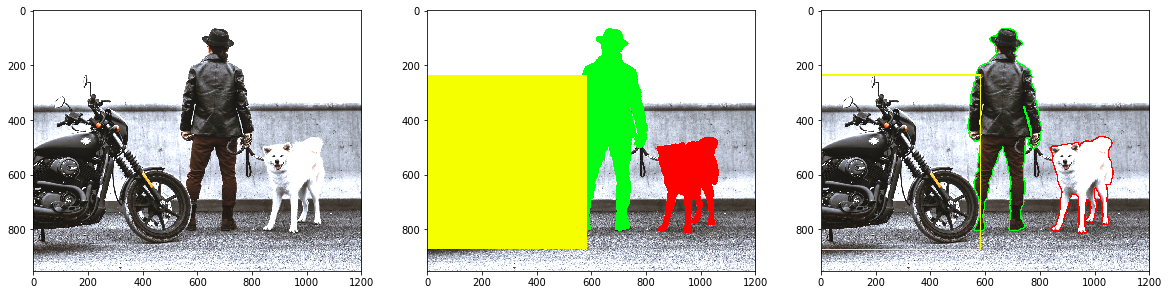

In [7]:
aug_img = sly.image.random_brightness(img, min_value=1, max_value=2)
draw(aug_img, ann)

# Contrast

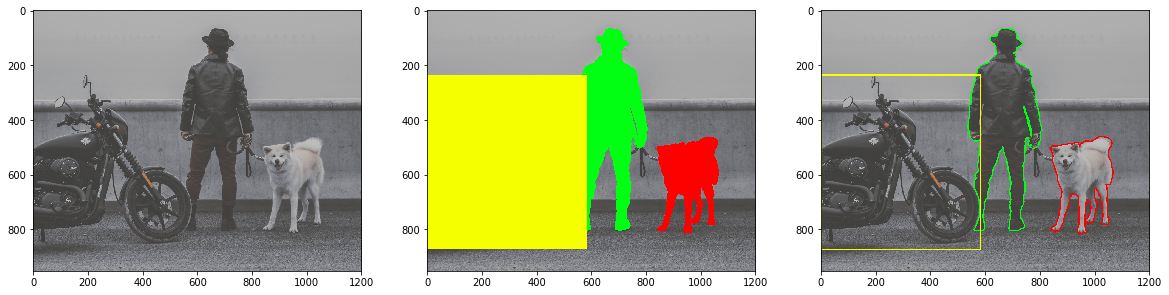

In [8]:
aug_img = sly.image.random_contrast(img, min_value=0.5, max_value=0.7)
draw(aug_img, ann)

# Noise

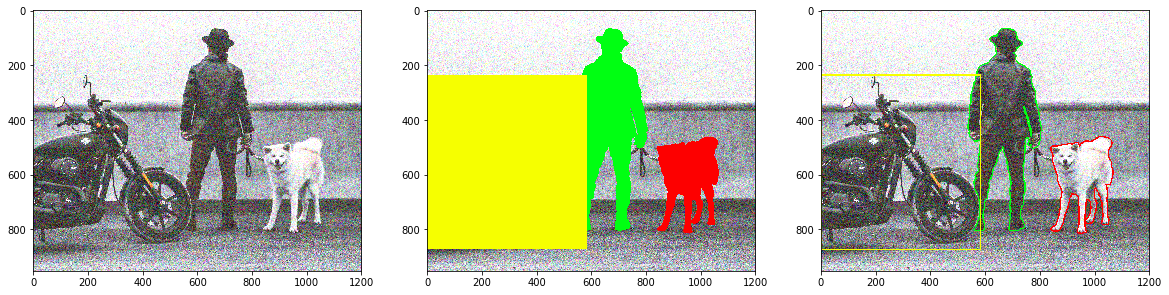

In [19]:
aug_img = sly.image.random_noise(img, mean=50, std=35)
draw(aug_img, ann)

# Color Scale

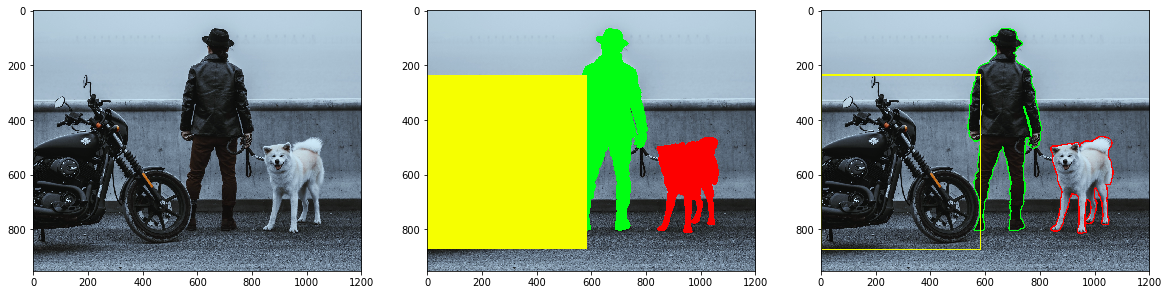

In [20]:
aug_img = sly.image.random_color_scale(img, strength=0.3)
draw(aug_img, ann)

# Blur

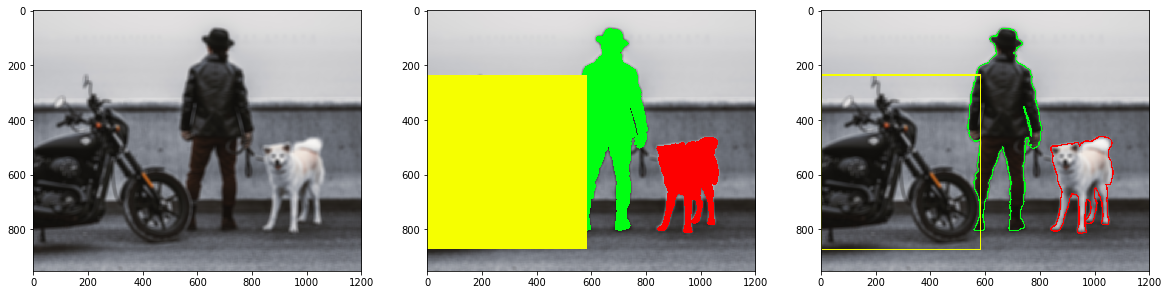

In [21]:
aug_img = sly.image.blur(img, kernel_size=15)
draw(aug_img, ann)

# Median Blur

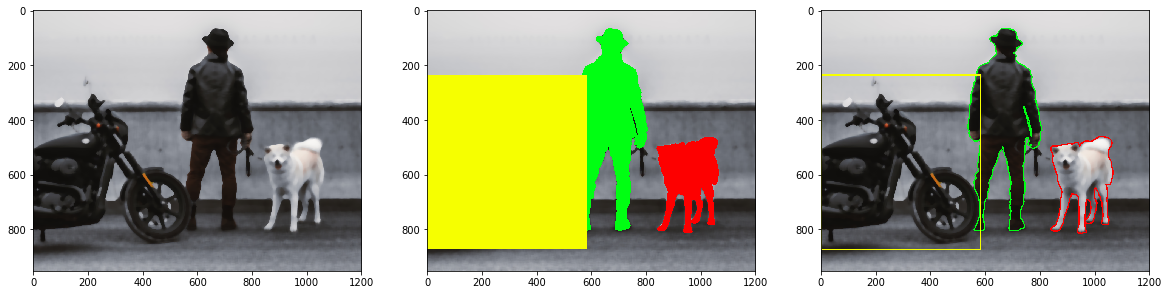

In [22]:
aug_img = sly.image.median_blur(img, kernel_size=15)
draw(aug_img, ann)

# Gaussian Blur

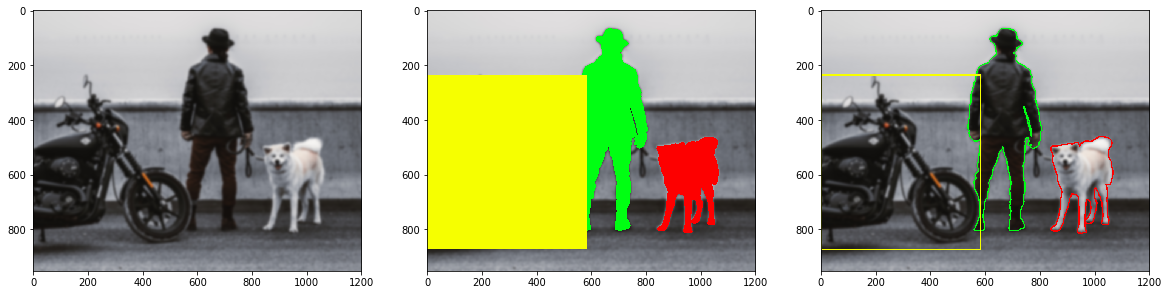

In [23]:
aug_img = sly.image.gaussian_blur(img, sigma_min=1, sigma_max=15)
draw(aug_img, ann)

# Done!